# WEATHER FORECAST
We implement the Markov chain describing the weather, and we make the trace-plot:

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import uniform
from astroML.stats import sigmaG

In [48]:
cloudy = 0
sunny = 1
p_given_cloudy = [0.5, 0.5]
p_given_sunny = [0.1, 0.9]
p_matrix = [p_given_cloudy, p_given_sunny]

day = cloudy
n_days = 10000
forecast = np.zeros(n_days)

for i in tqdm(range(0, n_days)):
    p = uniform(0, 1).rvs(1)
    if p < p_matrix[day][cloudy]:
        day = cloudy
    else:
        day = sunny
    forecast[i] = day

prob_sunny = np.cumsum(forecast)/np.arange(1, n_days + 1)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1630.81it/s]


Text(0, 0.5, 'p(clear)')

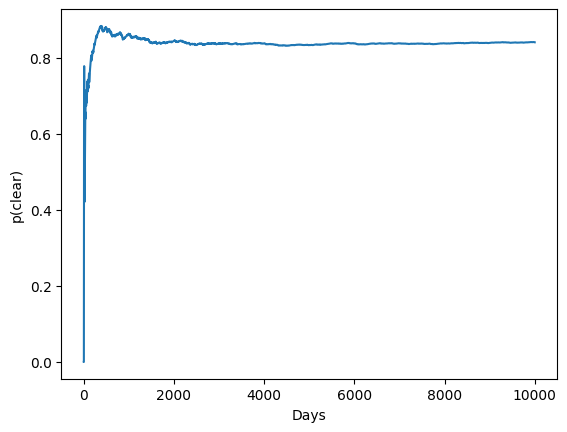

In [49]:
plt.plot(np.arange(1, n_days + 1), prob_sunny)
plt.xlabel("Days")
plt.ylabel("p(clear)")

We plot the histogram of the probability distribution $p(clear)$:

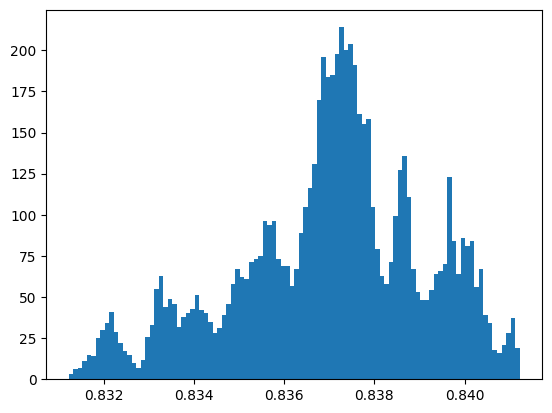

In [52]:
_ = plt.hist(prob_sunny[3000:], bins = 100)

We can compute median and $\sigma_G$:

In [51]:
print("Median: {:.4f}; sigmaG: {:.4f}".format(np.median(prob_sunny[2000:]), sigmaG(prob_sunny[2000:])))

Median: 0.8372; sigmaG: 0.0020
